# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Decision Tree </h1>

In [3]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

import chart_studio.plotly as plotly 
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from collections import Counter

## 1.1 Loading Data

In [7]:
!wget --header="Host: doc-0s-c8-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://drive.google.com/drive/folders/165O0Nc_m2Q4qGm8hS5anFooKT1s2dzAA" --header="Cookie: AUTH_rmdkgkn3e75uul7k1h4l4g2ou009nmsk_nonce=qvr4obitd30bs" --header="Connection: keep-alive" "https://doc-0s-c8-docs.googleusercontent.com/docs/securesc/m6pivea6kk9cdhef1flsrg228h1u1i44/4a88o30e32l0hq4stg3elq1ule8jd355/1589273625000/00484516897554883881/01895839698977569751/1TeNeIUHPKZZr0ZqrZ0gKEV7cCSw9ikIQ?e=download&authuser=0&nonce=qvr4obitd30bs&user=01895839698977569751&hash=2mpgt0v1gt2kuegp36h4jm2l67odb5av" -c -O 'preprocessed_data.csv'

--2020-05-12 08:55:50--  https://doc-0s-c8-docs.googleusercontent.com/docs/securesc/m6pivea6kk9cdhef1flsrg228h1u1i44/4a88o30e32l0hq4stg3elq1ule8jd355/1589273625000/00484516897554883881/01895839698977569751/1TeNeIUHPKZZr0ZqrZ0gKEV7cCSw9ikIQ?e=download&authuser=0&nonce=qvr4obitd30bs&user=01895839698977569751&hash=2mpgt0v1gt2kuegp36h4jm2l67odb5av
Resolving doc-0s-c8-docs.googleusercontent.com (doc-0s-c8-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0s-c8-docs.googleusercontent.com (doc-0s-c8-docs.googleusercontent.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘preprocessed_data.csv’

preprocessed_data.c     [     <=>            ] 118.69M  98.3MB/s    in 1.2s    

2020-05-12 08:55:52 (98.3 MB/s) - ‘preprocessed_data.csv’ saved [124454659]



In [148]:
data  = pd.read_csv('preprocessed_data.csv', nrows=50000)
data.head(2)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03

[2 rows x 9 columns]

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [149]:
# separating y from dataframe
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


school_state  ...   price
0           ca  ...  725.05

[1 rows x 8 columns]

In [150]:
data.columns.values

array(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price'], dtype=object)

In [0]:
# separating data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

##TFIDF vectorizer

In [152]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(X_train['essay'].values) 
X_train_eassy_tfidf = vectorizer_tfidf.fit_transform(X_train['essay'].values)
X_test_eassy_tfidf = vectorizer_tfidf.fit_transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_eassy_tfidf.shape, y_train.shape)
print(X_test_eassy_tfidf.shape, y_test.shape)
print("="*100)

(33500, 8) (33500,)
(16500, 8) (16500,)
After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


###TFIDF weighted W2V

In [17]:
!wget --header="Host: doc-0g-c8-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://drive.google.com/drive/folders/165O0Nc_m2Q4qGm8hS5anFooKT1s2dzAA" --header="Cookie: AUTH_rmdkgkn3e75uul7k1h4l4g2ou009nmsk=01895839698977569751|1589274150000|b8460qr7sp07tpq0mc9l43a0hjlli01u" --header="Connection: keep-alive" "https://doc-0g-c8-docs.googleusercontent.com/docs/securesc/m6pivea6kk9cdhef1flsrg228h1u1i44/dues4rarge37vm4jsk2igas9tb89osmm/1589274225000/00484516897554883881/01895839698977569751/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f?e=download&authuser=0" -c -O 'glove_vectors'

--2020-05-12 09:05:33--  https://doc-0g-c8-docs.googleusercontent.com/docs/securesc/m6pivea6kk9cdhef1flsrg228h1u1i44/dues4rarge37vm4jsk2igas9tb89osmm/1589274225000/00484516897554883881/01895839698977569751/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f?e=download&authuser=0
Resolving doc-0g-c8-docs.googleusercontent.com (doc-0g-c8-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-c8-docs.googleusercontent.com (doc-0g-c8-docs.googleusercontent.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove_vectors’

glove_vectors           [       <=>          ] 121.60M  46.8MB/s    in 2.6s    

2020-05-12 09:05:37 (46.8 MB/s) - ‘glove_vectors’ saved [127506004]



In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tf_idf_done(word_list):
  # average Word2Vec
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(word_list): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors
  

In [156]:
train_tfidf_w2v_essays=tf_idf_done(X_train['essay'].values)
test_tfidf_w2v_essays=tf_idf_done(X_test['essay'].values)

100%|██████████| 16500/16500 [00:30<00:00, 546.06it/s]


In [0]:
train_tfidf_w2v_essays = np.reshape(train_tfidf_w2v_essays,(len(train_tfidf_w2v_essays),len(train_tfidf_w2v_essays[0])))
test_tfidf_w2v_essays  = np.reshape(test_tfidf_w2v_essays,(len(test_tfidf_w2v_essays),len(test_tfidf_w2v_essays[0])))

In [158]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
print("After vectorizations")
print(train_tfidf_w2v_essays.shape,y_train.shape)
print(test_tfidf_w2v_essays.shape,y_test.shape)
print("="*100)

(33500, 8) (33500,)
(16500, 8) (16500,)
After vectorizations
(33500, 300) (33500,)
(16500, 300) (16500,)


#Make Data Model Ready: encoding numerical, categorical features

###encoding categorical features: School State

In [159]:
vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_school_state.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_school_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


###encoding categorical features: teacher_prefix


In [160]:
vectorizer_teacher_prefix = CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


###encoding categorical features: project_grade_category

In [161]:
vectorizer_project_grade_category = CountVectorizer()
vectorizer_project_grade_category.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_project_grade_category.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


###encoding categorical features: clean_categories


In [162]:
vectorizer_clean_categories = CountVectorizer()
vectorizer_clean_categories.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_category_ohe= vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_test_category_ohe = vectorizer_clean_categories.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer_clean_categories.get_feature_names())
print("="*100)

After vectorizations
(33500, 7) (33500,)
(16500, 7) (16500,)
['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']


###encoding categorical features: clean_subcategories

In [163]:
vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategory_ohe = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print(vectorizer_clean_subcategories.get_feature_names())
print("="*100)

After vectorizations
(33500, 28) (33500,)
(16500, 28) (16500,)
['appliedsciences', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts']


###Encoding numerical features: Price

In [164]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


###Encoding numerical features : teacher_number_of_previously_posted_projects

In [165]:
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_teacher_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


##Concatinating all the features

###data set1 with tfidf

In [192]:
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_eassy_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe  ,X_train_price_norm,X_train_teacher_posted_projects_norm)).tocsr()
X_te_set1 = hstack((X_test_eassy_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe  ,X_test_price_norm,X_test_teacher_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 5097) (33500,)
(16500, 5097) (16500,)


##data set2 with tfidf_weighted_w2v

In [193]:
from scipy.sparse import hstack
X_tr_set2= hstack((train_tfidf_w2v_essays, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe  ,X_train_price_norm,X_train_teacher_posted_projects_norm)).tocsr()
X_te_set2 = hstack((test_tfidf_w2v_essays, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe  ,X_test_price_norm,X_test_teacher_posted_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 5097) (33500,)
(16500, 5097) (16500,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

##Appling Decision Tree on different on data set1( with tf_idf )

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_tr_set1, y_train)

In [0]:
results = pd.DataFrame.from_dict(clf1.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
#cv_auc_std= results['std_test_score']
#results = results.sort_values(['param_max_depth'])
#results = results.sort_values(['param_min_samples_split'])
max_depth=  results['param_max_depth']
min_samples_split= results['param_min_samples_split']


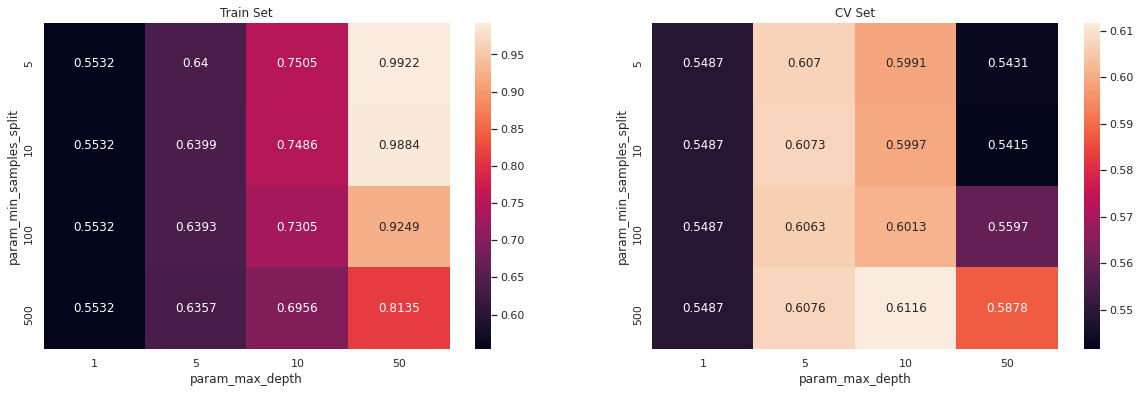

In [196]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(results).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [197]:
# best_parameters
print(clf1.best_params_)

{'max_depth': 10, 'min_samples_split': 500}


In [198]:
# best_estimitor
clf1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

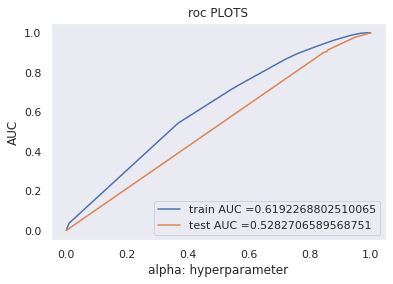

In [253]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

clf11= DecisionTreeClassifier(max_depth=10,random_state=0 ,min_samples_split=500,criterion='gini')
clf11.fit(X_tr_set1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred= clf11.predict_proba(X_tr_set1)[:,1]
y_test_pred = clf11.predict_proba(X_te_set1)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("roc PLOTS")
plt.grid()
plt.show()

##Confusion Matrix

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions       
    return predictions

In [201]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.34325782809583205 for threshold 0.881
Train confusion matrix
[[ 3394  1971]
 [12869 15266]]
Test confusion matrix
[[  411  2231]
 [ 1401 12457]]


#false positive data point analysis

###WORD CLOUD OF ESSAY

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_essay =[]    
for i in FPI :
  FP_essay.append(X_test['essay'].values[i])    

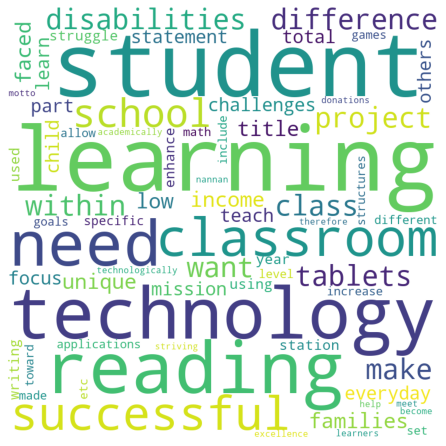

In [203]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in FP_essay:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## box plot of price

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_price =[]    
for i in FPI :
  FP_price.append(X_test['price'].values[i])

  




(2231, 1)


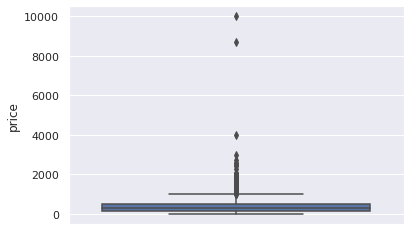

In [205]:
import seaborn as sns
FP_price1= pd.DataFrame({"price":FP_price})
sns.boxplot(y='price', data=FP_price1)
print(FP_price1.shape)

##pdf of FP_teacher_number_of_previously_posted_projects 

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_teacher_number_of_previously_posted_projects =[]    
for i in FPI :
  FP_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])


[9.20663380e-01 4.43747199e-02 1.47915733e-02 8.06813088e-03
 4.03406544e-03 3.58583595e-03 1.34468848e-03 4.48229494e-04
 1.34468848e-03 1.34468848e-03]
[  0.   19.4  38.8  58.2  77.6  97.  116.4 135.8 155.2 174.6 194. ]


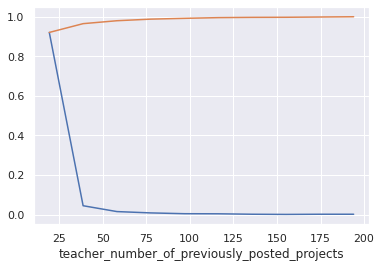

In [207]:
counts, bin_edges = np.histogram(FP_teacher_number_of_previously_posted_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
plt.xlabel('teacher_number_of_previously_posted_projects')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


##Apply Decision Tree on data set2(with tfidf_weighted_w2v)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set2= clf2.fit(X_tr_set2, y_train)

In [0]:
results = pd.DataFrame.from_dict(clf2.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
#cv_auc_std= results['std_test_score']
#results = results.sort_values(['param_max_depth'])
#results = results.sort_values(['param_min_samples_split'])
max_depth=  results['param_max_depth']
min_samples_split= results['param_min_samples_split']


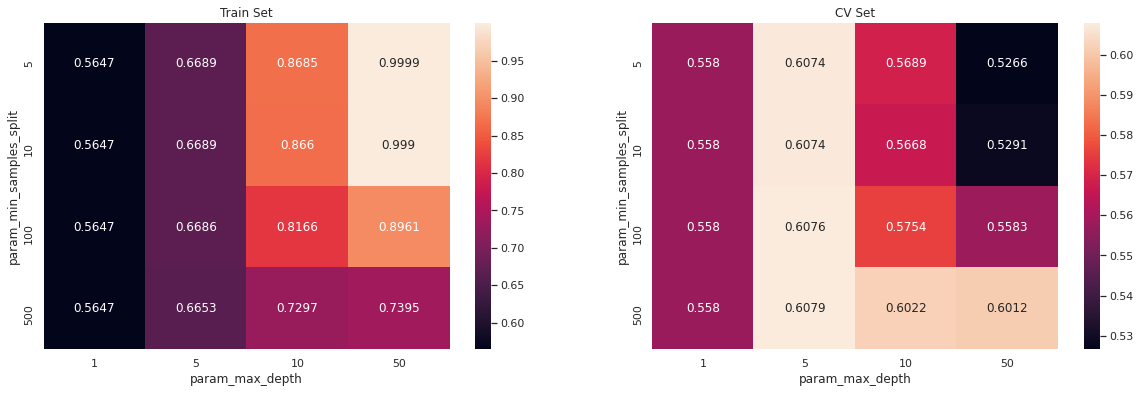

In [210]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(results).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [211]:
#best parameter
print(clf2.best_params_)

{'max_depth': 5, 'min_samples_split': 500}


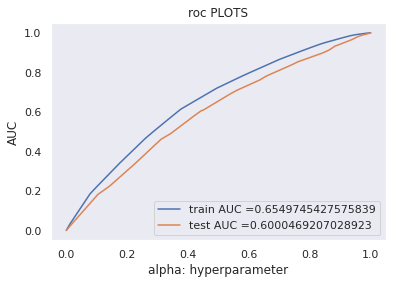

In [251]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
best_tune_parameters=[{'max_depth':[5], 'min_samples_split':[500] } ]

clf22 = DecisionTreeClassifier(max_depth=5,random_state=0 ,min_samples_split=500,criterion='gini')
clf22.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred= clf22.predict_proba(X_tr_set2)[:,1]
y_test_pred = clf22.predict_proba(X_te_set2)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("roc PLOTS")
plt.grid()
plt.show()

##Confusion Matrix

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions       
    return predictions

In [215]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4314059079087299 for threshold 0.841
Train confusion matrix
[[ 3463  1902]
 [ 9331 18804]]
Test confusion matrix
[[1355 1287]
 [4938 8920]]


#false positive data point analysis

##WORD CLOUD OF ESSAY

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_essay =[]    
for i in FPI :
  FP_essay.append(X_test['essay'].values[i])    

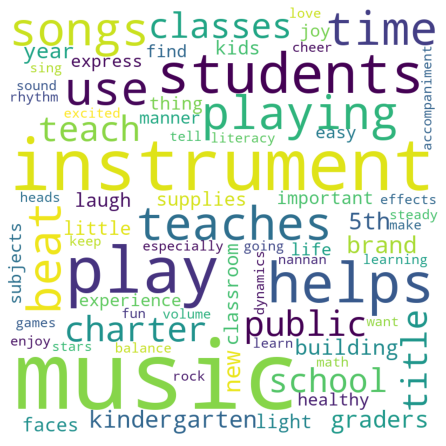

In [217]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in FP_essay:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


## box plot of fp_price

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_price =[]    
for i in FPI :
  FP_price.append(X_test['price'].values[i])

(1287, 1)


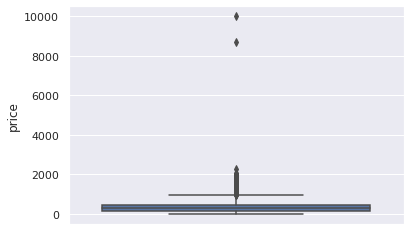

In [219]:
import seaborn as sns
FP_price1= pd.DataFrame({"price":FP_price})
sns.boxplot(y='price', data=FP_price1)
print(FP_price1.shape)

## pdf of FP_teacher_number_of_previously_posted_projects

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_teacher_number_of_previously_posted_projects =[]    
for i in FPI :
  FP_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])


[9.16083916e-01 4.35120435e-02 1.70940171e-02 7.77000777e-03
 3.10800311e-03 6.21600622e-03 3.10800311e-03 7.77000777e-04
 0.00000000e+00 2.33100233e-03]
[  0.   19.4  38.8  58.2  77.6  97.  116.4 135.8 155.2 174.6 194. ]


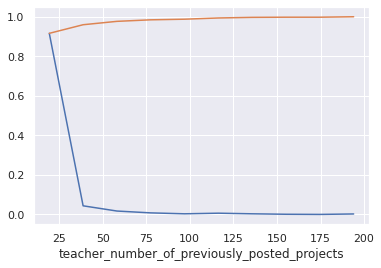

In [224]:
counts, bin_edges = np.histogram(FP_teacher_number_of_previously_posted_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
plt.xlabel('teacher_number_of_previously_posted_projects')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

<h2>1.6 Getting top features using `feature_importances_(of data set1(with tfidf)

In [227]:
c=clf11.feature_importances_
f_i_i= []
for i,j in enumerate(c):
  if j !=0:
    f_i_i.append(i)
print(len(f_i_i))    

23


In [228]:

X_tr_new = X_tr_set1[:,f_i_i]
X_te_new = X_te_set1[:,f_i_i]
print("new Data matrix")
print(X_tr_new.shape)
print(X_te_new.shape)

new Data matrix
(33500, 23)
(16500, 23)


##Applying Decision trees on non-zero feature importance

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt_new= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth':[1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf_new= GridSearchCV(dt_new, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set_new = clf_new.fit(X_tr_new, y_train)

In [0]:
results = pd.DataFrame.from_dict(clf_new.cv_results_)
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
#cv_auc_std= results['std_test_score']
#results = results.sort_values(['param_max_depth'])
#results = results.sort_values(['param_min_samples_split'])
max_depth=  results['param_max_depth']
min_samples_split= results['param_min_samples_split']

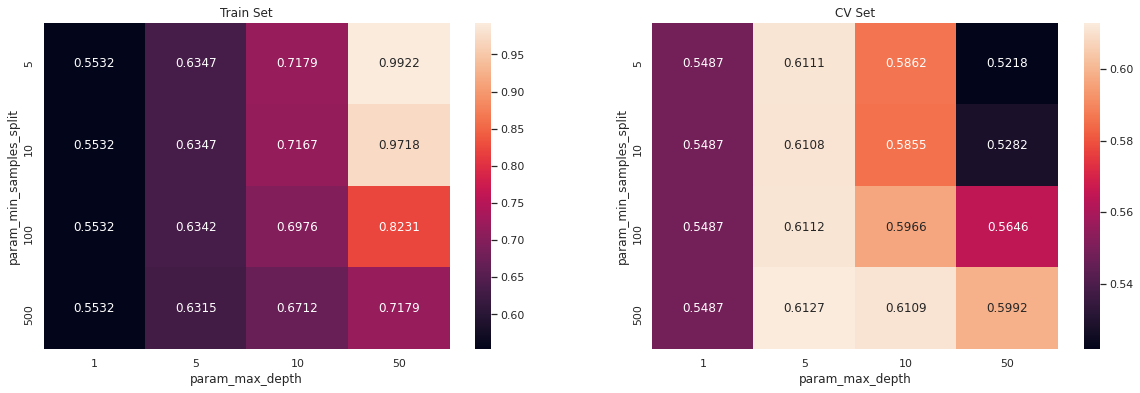

In [231]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(results).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [241]:
clf_new.best_params_

{'max_depth': 5, 'min_samples_split': 500}

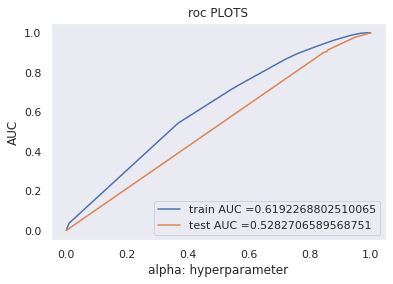

In [254]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
best_tune_parameters=[{'max_depth':[5], 'min_samples_split':[500] } ]

clf_new1= DecisionTreeClassifier(max_depth=5,random_state=0 ,min_samples_split=500,criterion='gini')
clf_new1.fit(X_tr_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred= clf_new1.predict_proba(X_tr_new)[:,1]
y_test_pred = clf_new1.predict_proba(X_te_new)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("roc PLOTS")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions       
    return predictions

In [244]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.34325782809583205 for threshold 0.881
Train confusion matrix
[[ 3394  1971]
 [12869 15266]]
Test confusion matrix
[[  411  2231]
 [ 1401 12457]]


##false positive data points'

##WordCloud of FP_essay

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_essay =[]    
for i in FPI :
  FP_essay.append(X_test['essay'].values[i])    

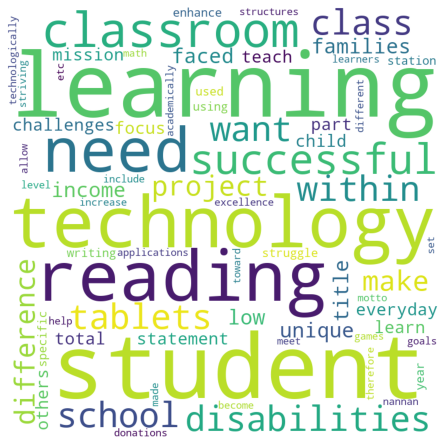

In [246]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in FP_essay:
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## box plot of FP_price

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_price =[]    
for i in FPI :
  FP_price.append(X_test['price'].values[i])


(2231, 1)


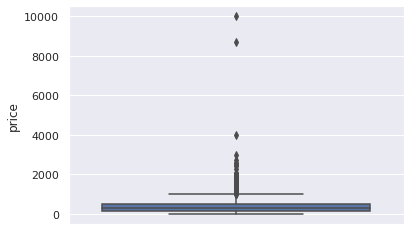

In [248]:
import seaborn as sns
FP_price1= pd.DataFrame({"price":FP_price})
sns.boxplot(y='price', data=FP_price1)
print(FP_price1.shape)

## pdf of FP_teacher_number_of_previously_posted_projects

In [0]:
predictions1=predict_with_best_t(y_test_pred, best_t)
FPI= []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i]==1):
    
    FPI.append(i)
FP_teacher_number_of_previously_posted_projects =[]    
for i in FPI :
  FP_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])


[9.20663380e-01 4.43747199e-02 1.47915733e-02 8.06813088e-03
 4.03406544e-03 3.58583595e-03 1.34468848e-03 4.48229494e-04
 1.34468848e-03 1.34468848e-03]
[  0.   19.4  38.8  58.2  77.6  97.  116.4 135.8 155.2 174.6 194. ]


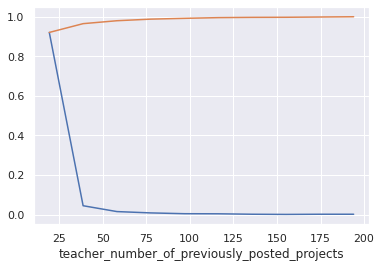

In [250]:
counts, bin_edges = np.histogram(FP_teacher_number_of_previously_posted_projects, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
plt.xlabel('teacher_number_of_previously_posted_projects')
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>2. Summary</h1>

In [255]:
 from tabulate import tabulate
weather_data = [('TFIDF', 'Decision trees ',"'max_depth': 10, 'min_samples_split': 500", 0.52),
                ('TFIDF_weighted_w2v', 'Decision trees ', "'max_depth': 5, 'min_samples_split': 500", 0.60),
                ('TFIDF_weighted_w2v', 'De',"'max_depth': 5, 'min_samples_split': 500", 0.52)
               ]
df = pd.DataFrame(weather_data, columns=['Vectorizer', 'Model', 'Hyper parameter', 'AUC'])


#Ref: https://pypi.org/project/tabulate/
print(tabulate(df, headers='keys', tablefmt='github'))

|    | Vectorizer         | Model          | Hyper parameter                           |   AUC |
|----|--------------------|----------------|-------------------------------------------|-------|
|  0 | TFIDF              | Decision trees | 'max_depth': 10, 'min_samples_split': 500 |  0.52 |
|  1 | TFIDF_weighted_w2v | Decision trees | 'max_depth': 5, 'min_samples_split': 500  |  0.6  |
|  2 | TFIDF_weighted_w2v | De             | 'max_depth': 5, 'min_samples_split': 500  |  0.52 |
